In [380]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Chargement des données

In [381]:
iris=pd.read_csv('./iris.txt', sep='\t', header=None)

In [382]:
X=iris.iloc[:,:-1].values
Y=iris.iloc[:, -1].values

In [383]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 1/3, random_state = 1)

In [441]:
class Perc:
    def __init__(self, input_size=4):
        self.input_size = input_size
        self.weight = np.random.rand(1, input_size)

    def predict(self, x):
        return np.dot(self.weight, x)

    def reset(self):
        self.weight = np.random.rand(1, self.input_size)

In [442]:
P1 = Perc()
P2 = Perc()
P3 = Perc()

In [443]:
def predict(XDeTest):
    YPred1 = P1.predict(XDeTest)
    YPred2 = P2.predict(XDeTest)
    YPred3 = P3.predict(XDeTest)
    proba = np.array([YPred1, YPred2, YPred3])
    algo = proba.argmax()+1
    return algo

def predictAll(XALL):
    ret = np.zeros(len(XALL))
    for i in range(0, len(XALL)):
        ret[i] = predict(XALL[i])
    return ret


def fit(XdeTrain, YDeTrain, epochs=500, eta=0.1, reset=False):
    if reset:
        P1.reset()
        P2.reset()
        P3.reset()
    for epoch in range(0, epochs):
        for i in range(len(XdeTrain)):
            donneeX = XdeTrain[i]
            donneeY = YDeTrain[i]

            Y1 = P1.predict(donneeX)
            Y2 = P2.predict(donneeX)
            Y3 = P3.predict(donneeX)

            if donneeY == 1:
                if Y1 <=0 :
                    P1.weight += eta*donneeX
                if Y2 > 0:
                    P2.weight -= eta*donneeX
                if Y3 > 0:
                    P3.weight -= eta*donneeX

            if donneeY == 2:
                if Y2 <= 0:
                    P2.weight += eta*donneeX
                if Y1 >= 0:
                    P1.weight -= eta*donneeX
                if Y3 >= 0:
                    P3.weight -= eta*donneeX

            if donneeY == 3:
                if Y3 <= 0 :
                    P3.weight += eta*donneeX
                if Y2 >= 0:
                    P2.weight -= eta*donneeX
                if Y1 >= 0:
                    P1.weight -= eta*donneeX


In [444]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
def matrix(YPred, YTest):
    cm = confusion_matrix(YTest, YPred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("Accuracy : " + str(accuracy_score(y_true=Ytest, y_pred=YPred)))
    print("Precision 1 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[0]))
    print("Precision 2 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[1]))
    print("Precision 3 : " + str(precision_score(y_true=Ytest, y_pred=YPred, average=None)[2]))
    print("Recall 1 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[0]))
    print("Recall 2 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[1]))
    print("Recall 3 : " + str(recall_score(y_true=Ytest, y_pred=YPred, average=None)[2]))

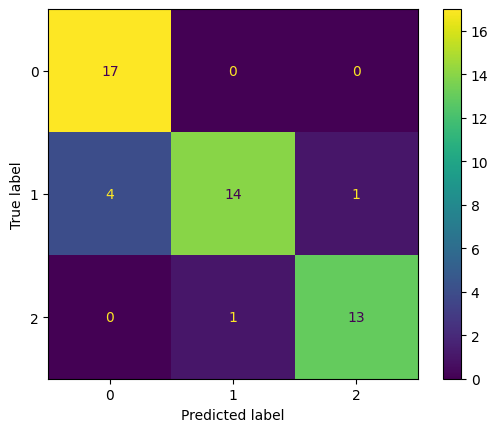

Accuracy : 0.88
Precision 1 : 0.8095238095238095
Precision 2 : 0.9333333333333333
Precision 3 : 0.9285714285714286
Recall 1 : 1.0
Recall 2 : 0.7368421052631579
Recall 3 : 0.9285714285714286


In [448]:
fit(Xtrain, Ytrain, epochs=1000, eta=0.01, reset=True)
matrix(predictAll(Xtest), Ytest)

### Normalisation des données

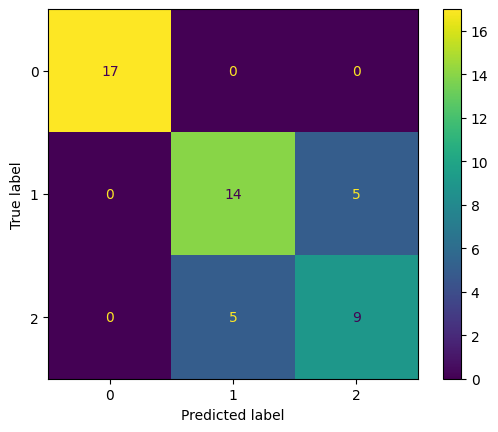

Accuracy : 0.8
Precision 1 : 1.0
Precision 2 : 0.7368421052631579
Precision 3 : 0.6428571428571429
Recall 1 : 1.0
Recall 2 : 0.7368421052631579
Recall 3 : 0.6428571428571429


In [432]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(Xtrain)
Xtrain_norm = SS.transform(Xtrain)
Xtest_norm = SS.transform(Xtest)

fit(Xtrain_norm, Ytrain, epochs=10, eta=0.0001, reset=True)
matrix(predictAll(Xtest_norm), Ytest)

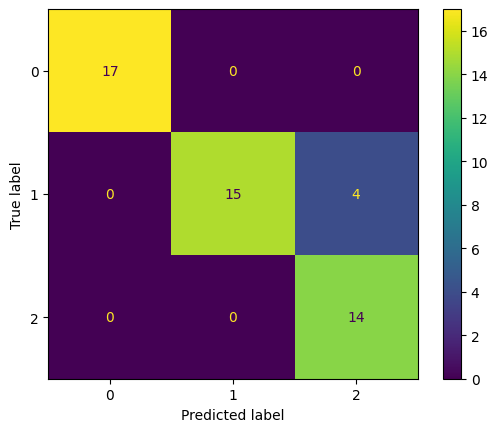

Accuracy : 0.92
Precision 1 : 1.0
Precision 2 : 1.0
Precision 3 : 0.7777777777777778
Recall 1 : 1.0
Recall 2 : 0.7894736842105263
Recall 3 : 1.0


array([[-0.85266944,  0.90971221, -1.29719124, -1.29488144],
       [-0.36957061,  1.15425851, -1.41133038, -1.29488144],
       [ 2.28747298,  1.88789739,  1.67042621,  1.28456366],
       [ 1.32127531,  0.17607333,  0.92852184,  1.1555914 ],
       [ 1.80437415, -0.31301926,  1.44214794,  0.76867464],
       [ 0.71740177, -0.55756555,  1.04266098,  1.28456366],
       [ 0.47585235, -0.55756555,  0.58610445,  0.76867464],
       [ 0.23430293,  0.90971221,  0.41489575,  0.51073013],
       [ 2.28747298, -0.55756555,  1.67042621,  1.02661915],
       [-0.12802119, -0.06847296,  0.24368705, -0.00515889],
       [-1.21499357,  0.90971221, -1.24012168, -1.29488144],
       [-0.12802119, -1.29120443,  0.70024358,  1.02661915],
       [ 0.59662706, -0.80211184,  0.64317401,  0.76867464],
       [-1.21499357, -0.06847296, -1.35426081, -1.42385369],
       [-1.33576828,  0.42061962, -1.41133038, -1.29488144],
       [ 0.83817648, -0.06847296,  1.15680011,  1.28456366],
       [-1.45654298,  0.

In [440]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state=1)
MLP.fit(Xtrain, Ytrain)
YMLP = MLP.predict(Xtest)
matrix(YMLP, Ytest)